# ANALIZA

## UVOD

Za projektno nalogo sem se odločila analizirati podatke o NBA igralcih v sezoni 2023/24. Podatki so objavljeni na spletni strani [basketball-reference.com](https://www.basketball-reference.com/leagues/NBA_2024_totals.html).

V tabeli s podatki so nekateri igralci napisani večkrat, ker so v tej sezoni igrali pri več ekipah. Najprej si oglejmo tabelo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns
plt.style.use("ggplot")
plt.rcParams['axes.prop_cycle'] = plt.cycler(color=['#008080'])
pd.options.mode.chained_assignment = None   # ignoriraj pandas warninge

nba = pd.read_csv('NBA.csv', encoding="utf-8", index_col="Player")
nba = nba.drop_duplicates(keep=False)       #da se zbisejo une vrstice
nba

,Pos,Age,Tm,G,MP,3P,2P,FT,AST,STL,BLK,PF,PTS
Player,,,,,,,,,,,,,
Precious Achiuwa,PF-C,24,TOT,74,1624,26,209,69,97,46,68,143,565
Precious Achiuwa,C,24,TOR,25,437,13,65,24,44,16,12,40,193
Precious Achiuwa,PF,24,NYK,49,1187,13,144,45,53,30,56,103,372
Bam Adebayo,C,26,MIA,71,2416,15,515,292,278,81,66,159,1367
Ochai Agbaji,SG,23,TOT,78,1641,62,116,37,83,47,44,117,455
...,...,...,...,...,...,...,...,...,...,...,...,...,...
Thaddeus Young,PF,35,PHO,10,89,0,11,1,7,5,2,11,23
Trae Young,PG,25,ATL,54,1942,175,258,348,583,72,11,109,1389
Omer Yurtseven,C,25,UTA,48,545,5,94,19,29,8,18,52,222


Med podatki so tudi vrstice, ki za igralce pri več ekipah izračunajo vsoto vendar nas ta podatek ne zanima, zato jih izbrišemo.

In [2]:
nba = nba[nba["Tm"].str.contains("TOT") == False]

Podatki v tabeli so najprej v obliki "stringov" zato jih moramo spremeniti v numerične, da jih lahko analiziramo.

In [3]:
NUMERIC_COLS = ['Age', 'G', 'MP', '3P', '2P', 'FT',
       'AST', 'STL', 'BLK', 'PF', 'PTS']

nba_num = nba[NUMERIC_COLS]

nba_num = nba_num.apply(pd.to_numeric, errors='coerce').fillna(nba_num) # pretvorimo numerične iz str v stevilke



# dodamo numerične nazaj
nba[NUMERIC_COLS] = nba_num 

nba.dtypes

#treba odstrant to napako

Pos    object
Age     int64
Tm     object
G       int64
MP      int64
3P      int64
2P      int64
FT      int64
AST     int64
STL     int64
BLK     int64
PF      int64
PTS     int64
dtype: object

Vidimo, da so podatki pravilne oblike, torej jih lahko začnemo analizirati. 

## IGRALCI

Oglejmo si najprej, kaj nam pokaže prvih 15 vrstic tabele.

In [4]:
nba.head(15)

,Pos,Age,Tm,G,MP,3P,2P,FT,AST,STL,BLK,PF,PTS
Player,,,,,,,,,,,,,
Precious Achiuwa,C,24,TOR,25,437,13,65,24,44,16,12,40,193
Precious Achiuwa,PF,24,NYK,49,1187,13,144,45,53,30,56,103,372
Bam Adebayo,C,26,MIA,71,2416,15,515,292,278,81,66,159,1367
Ochai Agbaji,SG,23,UTA,51,1003,47,59,15,47,27,29,66,274
Ochai Agbaji,SG,23,TOR,27,638,15,57,22,36,20,15,51,181
Santi Aldama,PF,23,MEM,61,1618,106,141,54,138,43,54,89,654
Nickeil Alexander-Walker,SG,25,MIN,82,1921,131,105,52,204,64,42,143,655
Grayson Allen,SG,28,PHO,75,2513,205,135,129,227,69,45,157,1014
Jarrett Allen,C,25,CLE,77,2442,0,519,233,210,53,81,147,1271


Opazimo, da so razporejeni po abecedi, kar nam nič ne pove. Uredimo jih po največ doseženih točkah.

In [5]:
urejeno_tocke = nba.sort_values(['PTS'], ascending=False).head(15)
urejeno_tocke[["PTS", "Tm", "Pos"]]

,PTS,Tm,Pos
Player,,,
Luka Dončić,2370,DAL,PG
Shai Gilgeous-Alexander,2254,OKC,PG
Giannis Antetokounmpo,2222,MIL,PF
Jalen Brunson,2212,NYK,PG
Nikola Jokić,2085,DEN,C
Anthony Edwards,2049,MIN,SG
Kevin Durant,2032,PHO,PF
Jayson Tatum,1987,BOS,PF
De'Aaron Fox,1966,SAC,PG


Na prvem mestu po številu točk je Slovenec Luka Dončić. Poglejmo si še, kateri igralci so zadeli največ košev za tri točke in jih razvrstimo od najmlajšega proti najstarejšemu.

In [6]:
urejeno_trojke = nba[nba["3P"] >= 210].sort_values("Age")
urejeno_trojke[['3P','Age']]

,3P,Age
Player,,
Tyrese Maxey,212,23
Luka Dončić,284,24
Michael Porter Jr.,220,25
Jayson Tatum,229,25
De'Aaron Fox,214,26
Donte DiVincenzo,283,27
Malik Beasley,224,27
Mikal Bridges,220,27
Jalen Brunson,211,27


Vidimo, da ima Stephen Curry ogromno prednost pred ostalimi, čeprav je najstarjši med vsemi igralci v zgornji tabeli.

Pa poglejmo, katera starost sploh prevladuje na igrišču.

Text(0.5, 1.0, 'Igralci po starosti')

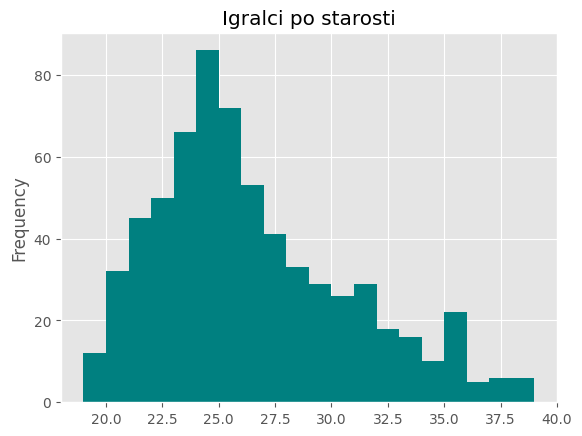

In [7]:
nba["Age"].plot.hist(bins=20)
#plt.xticks(np.arange(0,10))
plt.title("Igralci po starosti")

Iz grafa lahko vidimo, da je največ igralcev starih med 22 in 27 let. Poglejmo še kateri je najmlajši in kateri najstarejši igralec.

In [8]:
najnizja_starost = nba["Age"].min()
print(f"Najnižja starost je: {najnizja_starost}")
prestej_najmlajsi = nba["Age"].value_counts()[najnizja_starost]
print(f"Število najmlajših igralcev je: {prestej_najmlajsi}")

if prestej_najmlajsi == 1:
    print("Najmlajši igralec je:")
else:
    print("Najmlajši igralci so:")
najmlajsi_igralec = nba[nba["Age"] == najnizja_starost]
najmlajsi_igralec.sort_values("PTS", ascending=False)


Najnižja starost je: 19
Število najmlajših igralcev je: 12
Najmlajši igralci so:


,Pos,Age,Tm,G,MP,3P,2P,FT,AST,STL,BLK,PF,PTS
Player,,,,,,,,,,,,,
Scoot Henderson,PG,19,POR,62,1765,87,220,167,336,48,13,195,868
GG Jackson II,PF,19,MEM,48,1233,102,139,115,59,28,24,64,699
Cam Whitmore,SF,19,HOU,47,880,79,133,76,33,30,17,64,579
Bilal Coulibaly,SF,19,WAS,63,1715,64,124,92,110,57,48,137,532
Dereck Lively II,C,19,DAL,55,1294,0,221,41,60,36,77,144,483
Nick Smith Jr.,SG,19,CHO,51,729,63,50,13,59,10,7,55,302
Rayan Rupert,SG,19,POR,39,633,28,26,19,62,12,3,56,155
Noah Clowney,PF,19,BRK,23,370,12,38,21,18,8,16,25,133
Sidy Cissoko,SF,19,SAS,12,141,1,15,12,10,7,3,18,45


In [9]:
najvisja_starost = nba["Age"].max()
print(f"Najvišja starost je: {najvisja_starost}")
prestej_najstarejsi = nba["Age"].value_counts()[najvisja_starost]
print(f"Število najstarejših igralcev je: {prestej_najstarejsi}")

if prestej_najstarejsi == 1:
    print("Najstarejši igralec je:")
else:
    print("Najstarejši igralci so:")
najstarejši_igralec = nba[nba["Age"] == najvisja_starost]
najstarejši_igralec.sort_values("PTS", ascending=False)


Najvišja starost je: 39
Število najstarejših igralcev je: 1
Najstarejši igralec je:


,Pos,Age,Tm,G,MP,3P,2P,FT,AST,STL,BLK,PF,PTS
Player,,,,,,,,,,,,,
LeBron James,PF,39,LAL,71,2504,149,536,303,589,89,38,78,1822


## EKIPE

V NBA ligi igra 30 različnih ekip. Poglejmo si najprej, katere so te ekipe.

In [10]:
ekipe = nba["Tm"]
ekipe = set(ekipe)
ekipe


{'ATL',
 'BOS',
 'BRK',
 'CHI',
 'CHO',
 'CLE',
 'DAL',
 'DEN',
 'DET',
 'GSW',
 'HOU',
 'IND',
 'LAC',
 'LAL',
 'MEM',
 'MIA',
 'MIL',
 'MIN',
 'NOP',
 'NYK',
 'OKC',
 'ORL',
 'PHI',
 'PHO',
 'POR',
 'SAC',
 'SAS',
 'TOR',
 'UTA',
 'WAS'}

Preverimo, katerih 5 ekip je v tej sezoni imelo največ skupnih točk.

In [11]:
def tocke_na_ekipo(ekipa): 
    ustrezne_vrstice = nba[nba["Tm"] == ekipa] 
    skupne_tocke_na_ekipo = ustrezne_vrstice["PTS"].sum()  
    return skupne_tocke_na_ekipo

slovar_ekipe_tocke = {ekipa : tocke_na_ekipo(ekipa) for ekipa in ekipe}

ekipe_po_tockah = sorted(slovar_ekipe_tocke, key=slovar_ekipe_tocke.get, reverse=True)
top_ekipe = ekipe_po_tockah[:5]

top_ekipe

['IND', 'BOS', 'OKC', 'MIL', 'ATL']

Poglejmo si še z grafom, kolikšen delež točk je prejela vsaka od teh petih ekip.

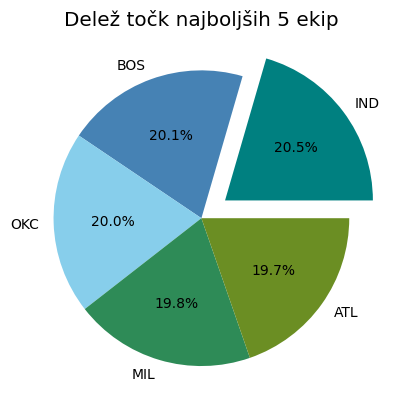

In [12]:
top_ekipe_tocke = [tocke_na_ekipo(ekipa) for ekipa in top_ekipe]

y = np.array(top_ekipe_tocke)
labels = [ekipa for ekipa in top_ekipe]
explode = [0.2, 0, 0, 0, 0]
colors = ["#008080", "#4682B4", "#87CEEB", "#2E8B57", "#6B8E23" ]

plt.pie(y, labels=labels, autopct='%1.1f%%', colors=colors, explode=explode)
plt.title("Delež točk najboljših 5 ekip")
plt.show() 


Po procentih vidimo, da je največ točk dosegla ekipa Indiana Pacers. Ker so vsi deleži skoraj enako veliki, poglejmo za koliko točk so se ekipe dejansko razlikovale.

In [13]:
for par in zip(top_ekipe, top_ekipe_tocke):
    print(par)


('IND', np.int64(10110))
('BOS', np.int64(9887))
('OKC', np.int64(9847))
('MIL', np.int64(9756))
('ATL', np.int64(9703))


Za naključno ekipo si oglejmo, kateri so njeni igralci in kateri izmed njih je najbolj "zanesljiv" (torej tisti, ki ima največ minut na igriščču).

In [14]:
bucks = nba[nba['Tm'].str.contains('MIL')]
bucks_urejeno = bucks.sort_values("MP", ascending=False)
bucks_urejeno[["MP"]]

,MP
Player,
Damian Lillard,2579
Giannis Antetokounmpo,2567
Brook Lopez,2411
Malik Beasley,2337
Bobby Portis,2008
Pat Connaughton,1676
Khris Middleton,1487
Jae Crowder,1156
Cameron Payne,702


Zgoraj so podatki o igralcih ekipe Milwaukee Bucks, za vse ostale ekipe bi preverili na isti način.

## OSEBNE NAPAKE

Zanimiv podatek za analizo, je tudi število osebnih napak košarkašev. Najprej poglejmo, kateri igralec je imel v sezoni 2023/24 največ osebnih napak, potem pa si bomo ogledali še, kateri drugi podatki vplivajo na to število.

In [15]:
najvec_os_napak_id = nba["PF"].idxmax()
najvec_os_napak_igralec = nba.loc[najvec_os_napak_id]
najvec_os_napak_igralec[["Age", "Pos", "Tm", "PF"]].to_frame().T


,Age,Pos,Tm,PF
Jusuf Nurkić,29,C,PHO,254


Najprej narišimo graf, ki prikazuje število osebnih napak v odvisnosti od starosti igralcev.

Text(0.5, 1.0, 'Razmerje med starostjo in št. osebnih napak')

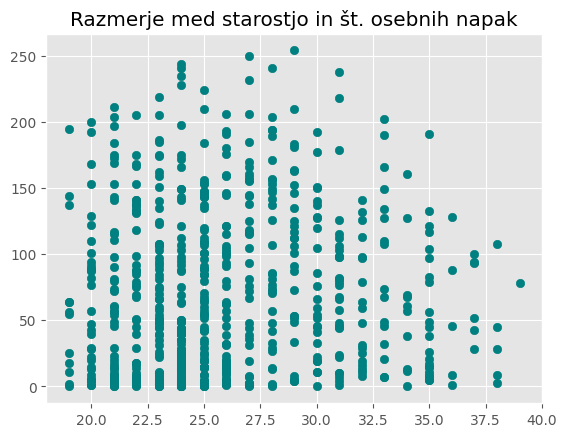

In [16]:
plt.scatter(nba["Age"], nba["PF"])
plt.title("Razmerje med starostjo in št. osebnih napak")

Žal nam ta graf ne pove veliko, kar pomeni, da starost nima vpliva na to. Oglejmo si raje, kako na število napak vpliva število točk posameznih igralcev.

Text(0.5, 1.0, 'Razmerje med številom točk in osebnih napak')

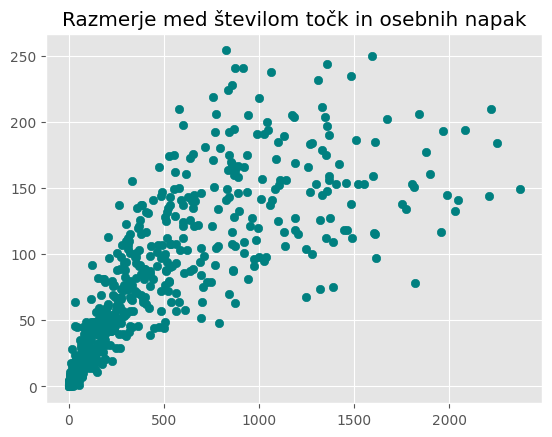

In [17]:
plt.scatter(nba["PTS"], nba["PF"])
plt.title("Razmerje med številom točk in osebnih napak")

Vidimo, da več točk pomeni tudi več osebnih napak, kar smo tudi pričakovali. Če igralec dobi več točk, pomeni da je verjetno bil več minut na igrišču in zato je bilo več možnosti za osebne napake.

## POVPREČJE TOČK NA TEKMO

Dodajmo v tabelo podatkov nov stolpec, ki za vsakega izračuna povprečno število točk na igro.

In [18]:
povprecje_tock = round(nba["PTS"] / nba["G"], 2)
nba["Avg Pts"] = povprecje_tock

urejeno_povp = nba.sort_values("Avg Pts", ascending=False)
urejeno_povp[["Avg Pts","PTS", "G"]].head(15)


,Avg Pts,PTS,G
Player,,,
Joel Embiid,34.69,1353,39
Luka Dončić,33.86,2370,70
Giannis Antetokounmpo,30.44,2222,73
Shai Gilgeous-Alexander,30.05,2254,75
Jalen Brunson,28.73,2212,77
Kevin Durant,27.09,2032,75
Devin Booker,27.07,1841,68
Jayson Tatum,26.85,1987,74
Donovan Mitchell,26.60,1463,55


Preverimo, katere ekipe imajo največ takih igralcev, ki so v povprečju dosegli vsaj 25 točk na igro.

In [19]:
povprecno_vec_kot_25_ekipe = nba[nba["Avg Pts"] >= 25]
povprecno_vec_kot_25_ekipe.groupby("Tm").size().sort_values(ascending=False)

Tm
DAL    2
PHI    2
PHO    2
CLE    1
DEN    1
BOS    1
ATL    1
LAL    1
GSW    1
MEM    1
MIL    1
NYK    1
MIN    1
OKC    1
SAC    1
dtype: int64

## POZICIJE

Vpliv na število doseženih točk ima tudi pozicija igralca. Poglejmo najprej, katere pozicije obstajajo.

In [20]:
pozicije = nba["Pos"]
pozicije = set(pozicije)
pozicije

{'C', 'PF', 'PG', 'SF', 'SG'}

Narišimo graf, kjer bomo prikazali skupno število točk, glede na pozicijo. Za lažje razumevanje, so tu še slovenski izrazi za pozicije:
- PG - organizator (point guard)
- SG - branilec (shooting guard)
- SF - krilo (small forward)
- PF - krilni center (power forward)
- C - center (center)

In [21]:
#a tm more bit una ta druga vejca al ne

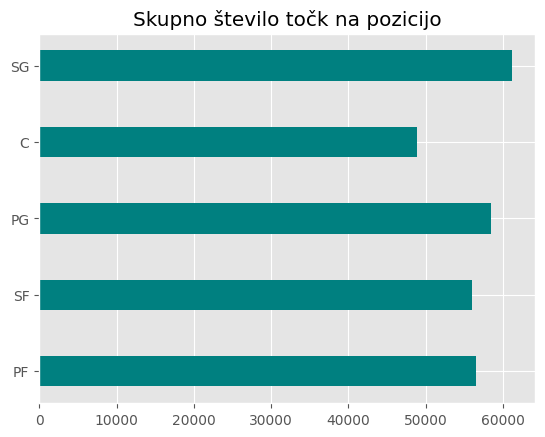

In [22]:
def tocke(poz): 
    ustrezne_vrstice = nba[nba["Pos"] == poz]  
    skupne_tocke_na_pozicijo = ustrezne_vrstice["PTS"].sum()  
    return skupne_tocke_na_pozicijo

x = np.array([poz for poz in pozicije])
y = np.array([tocke(poz) for poz in pozicije])

plt.barh(x, y, height = 0.4)
plt.title("Skupno število točk na pozicijo")
plt.show()


Opazimo lahko, da najmanj dosežejo igralci v poziciji C (center). Iz tega lahko sklepamo, da tej igralci prevladujejo v drugih kategorijah kot je na primer število blokov.

In [23]:
#a je tej pa blok knjizna beseda

In [24]:
urejeni_bloki = nba.sort_values(['BLK'], ascending=False).head(15)
urejeni_bloki[["BLK", "Pos"]]

,BLK,Pos
Player,,
Victor Wembanyama,254,C
Chet Holmgren,190,C
Brook Lopez,189,C
Anthony Davis,178,C
Rudy Gobert,162,C
Walker Kessler,154,C
Nic Claxton,146,C
Myles Turner,144,C
Kristaps Porziņģis,111,C


## KONEC
Čisto za konec pa me je še zanimalo, če so kateri od podatkov med seboj v korelaciji. Edin podatek, ki bi bil zanimiv za to analizo, je starost. Prej smo že ugotovili, da starost ne vpliva na število osebnih napak. Ali vpliva na kaj drugega?

<Axes: >

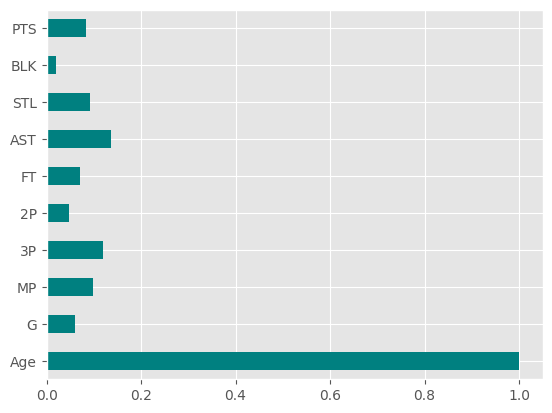

In [25]:
nba[['Age','G', 'MP', '3P', '2P', 'FT', 
     'AST', 'STL', 'BLK', 'PTS']].corr()["Age"].plot.barh()

Zgornji graf predstavlja, koliko so podatki korelirani med sabo (0 - niso, 1 - so).
Seveda je starost najbolj v korelaciji sama s sabo, z ostalmi podatki pa skoraj nič ni, kar me je zelo presentilo. Torej smo ugotovili, da starost nima posebnega vpliva.

In [26]:
#a je korelirani beseda
#pa kle se loh se kej doda 